In [106]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [38]:
sns.set(rc={"figure.figsize":(12,10)})

## Loading Dataset 

In [141]:
data = pd.read_csv("titanic_data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Numerical Data Analysis

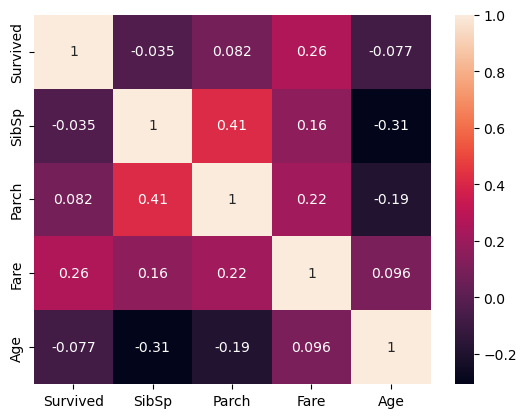

In [16]:
headmp = sns.heatmap(data[["Survived", "SibSp", "Parch", "Fare", "Age"]].corr(), annot=True)

## <font color="green"> SibSp : No of sibilings/ spouses abroad the titanic </font>

In [18]:
data["SibSp"].nunique()

7

In [20]:
data["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

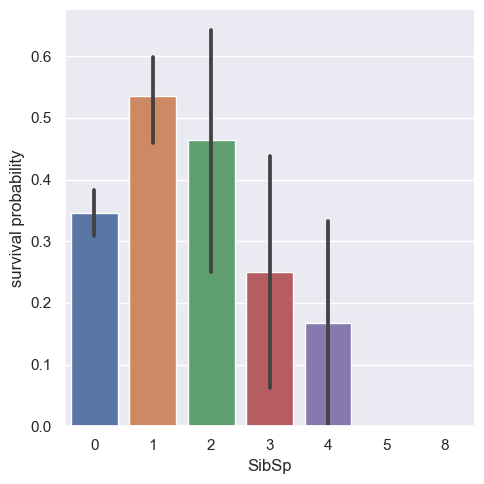

In [33]:
sns.catplot(x="SibSp", y="Survived", data = data, kind="bar").set_ylabels("survival probability")

## <font color="green"> Age </font>

C:\Users\amith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\amith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


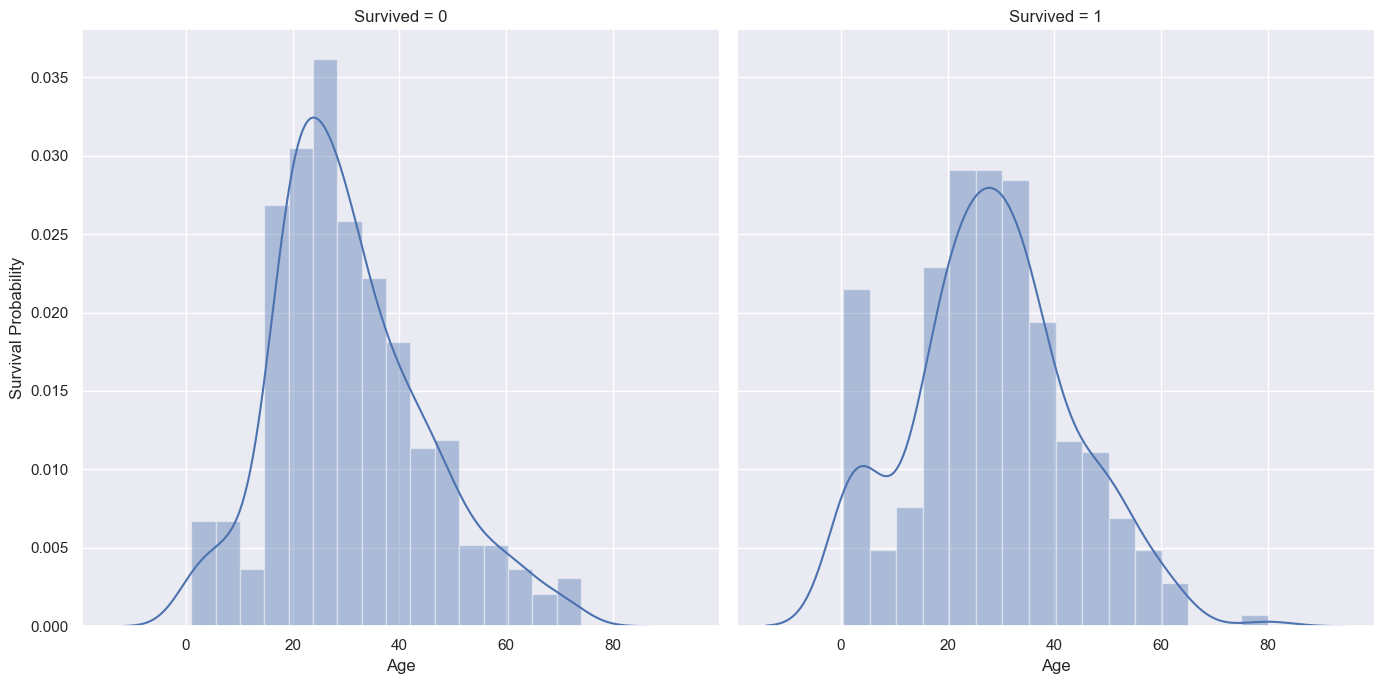

In [36]:
age_visual = sns.FacetGrid(data=data, col="Survived", height=7)
age_visual = age_visual.map(sns.distplot, "Age").set_ylabels("Survival Probability")

## <font color="green"> Sex </font>

Text(0, 0.5, 'Survival Probability')

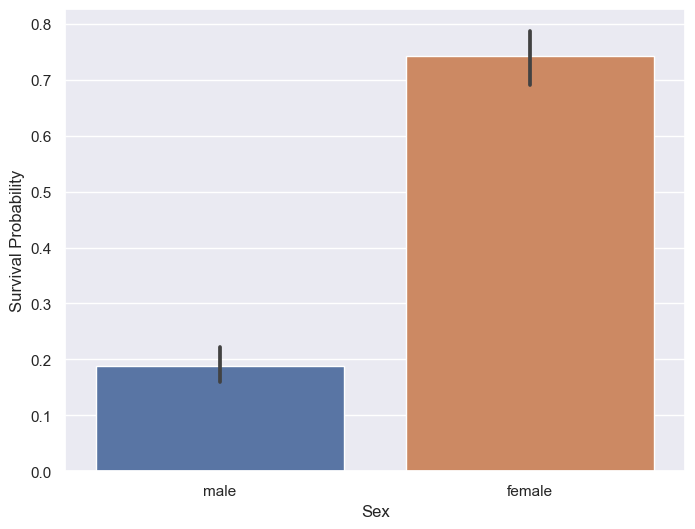

In [44]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x="Sex", y="Survived").set_ylabel("Survival Probability")

In [47]:
data[["Sex","Survived"]].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


## <font color="green">PClass Class of A person <font>

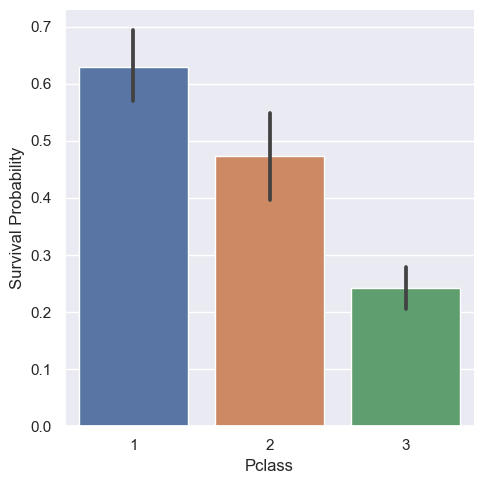

In [56]:
sns.catplot(data=data,x ="Pclass", y="Survived", kind="bar" ).set_ylabels("Survival Probability")

## <font color="green"> Embarked </font>

In [59]:
data["Embarked"].isnull().sum()

2

In [62]:
data["Embarked"].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [142]:
data["Embarked"] = data["Embarked"].fillna("S")
data["Embarked"].isnull().sum()

0

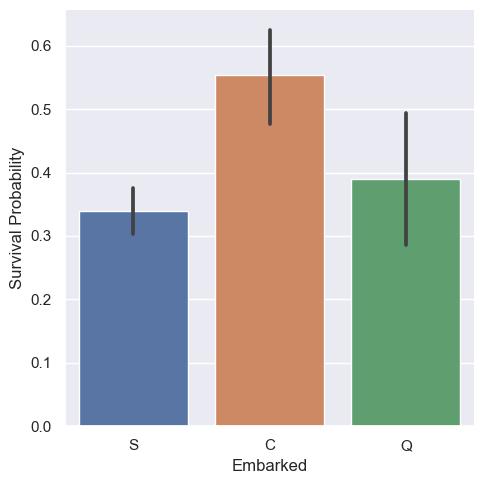

In [67]:
sns.catplot(data=data, x="Embarked", y="Survived", kind="bar").set_ylabels("Survival Probability")

###### explore Pclass v Embarked

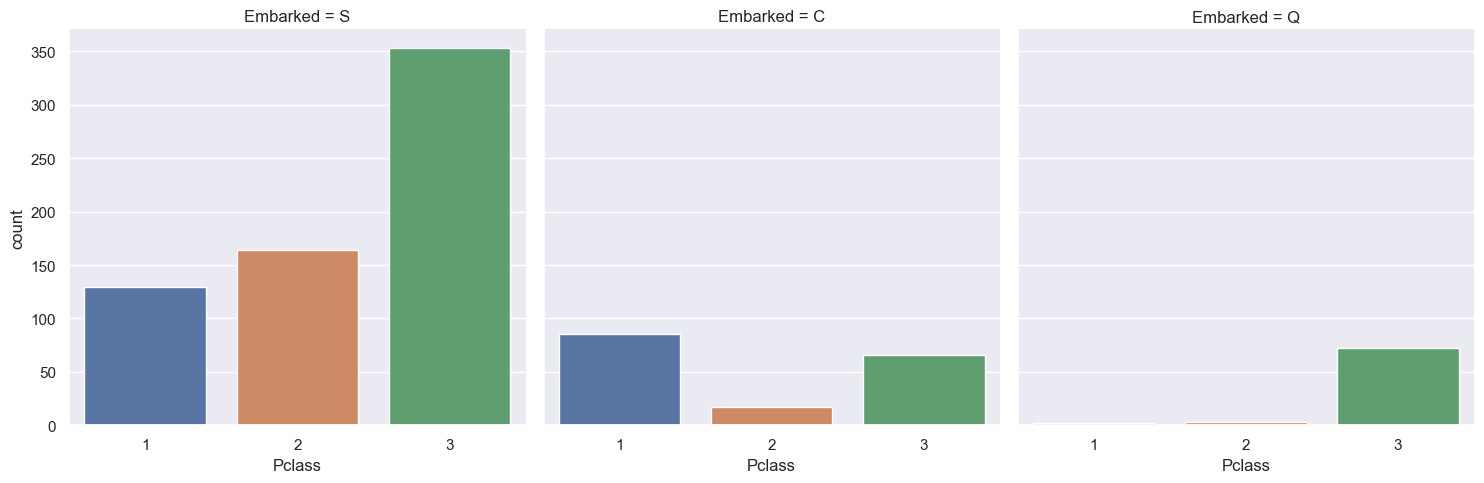

In [69]:
sns.catplot(data=data, x="Pclass", col="Embarked", kind="count")

###### explore Sex and Embarked

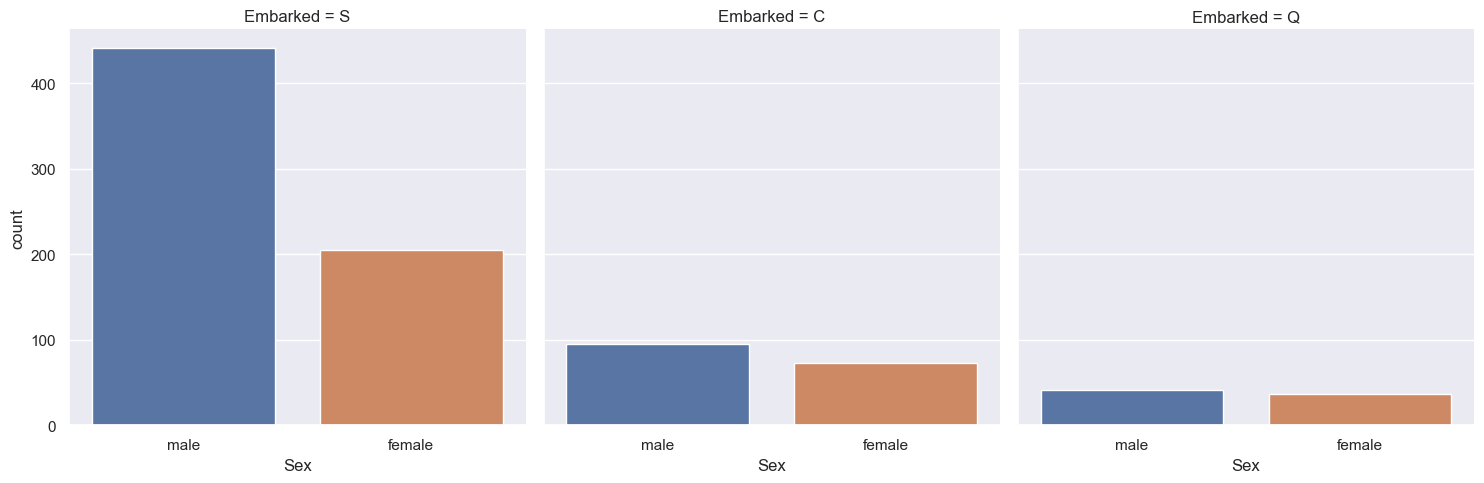

In [73]:
sns.catplot(data=data, x="Sex", col="Embarked", kind="count")

## <font color="blue"> Prepairing Data </font>

In [108]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [116]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [143]:
mean = data["Age"].mean()
std = data["Age"].std()
print(mean," ", std)

29.69911764705882   14.526497332334044


In [144]:
rand_age = np.random.randint(mean-std, mean+std, size=177 ) 
rand_age

array([28, 18, 39, 19, 42, 29, 25, 32, 16, 17, 34, 15, 15, 22, 34, 37, 26,
       19, 38, 20, 21, 18, 37, 24, 20, 32, 23, 28, 18, 26, 24, 25, 15, 43,
       17, 23, 27, 15, 40, 26, 24, 32, 24, 33, 36, 18, 38, 40, 19, 40, 43,
       34, 32, 21, 32, 39, 38, 27, 29, 32, 33, 40, 23, 27, 16, 36, 35, 36,
       43, 27, 20, 26, 43, 31, 31, 35, 21, 25, 29, 19, 18, 17, 43, 31, 32,
       30, 17, 34, 35, 41, 31, 19, 17, 41, 30, 17, 30, 37, 15, 18, 42, 28,
       27, 25, 32, 32, 22, 24, 23, 26, 41, 24, 23, 17, 41, 43, 28, 37, 29,
       19, 37, 23, 17, 43, 32, 34, 21, 23, 15, 31, 32, 29, 39, 27, 20, 27,
       40, 41, 33, 15, 16, 29, 17, 40, 18, 35, 19, 35, 18, 17, 25, 20, 40,
       42, 16, 36, 16, 30, 34, 24, 22, 34, 24, 26, 34, 36, 41, 25, 21, 37,
       15, 21, 26, 36, 36, 32, 16])

In [145]:
a = data["Age"].copy()
a[np.isnan(a)] = rand_age
data["Age"] = a

In [146]:
data["Age"].isna().sum()

0

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## <font color="blue"> Dropping Unwanted Data</font>

In [148]:
data.drop(columns=["PassengerId", "Cabin", "Ticket","Name"], inplace=True, axis =1)

In [121]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### converting categorical data to numerical


In [149]:
df= data.copy()
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [128]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [150]:
genders = {"male": 0, "female": 1}
data["Sex"] = data["Sex"].replace(genders)

In [151]:
ports = {"S":0, "C":1, "Q":2}
data["Embarked"] = data["Embarked"].map(ports)

In [152]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


## <font color="blue"> Splitting up the Data </font>

In [153]:
x = data.drop(columns=["Survived"], axis=1)

In [157]:
y = data["Survived"]

In [160]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=0)

## <font color="blue"> Scaling the Data </font>

In [162]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# <font color="red"> CLASSIFICATION </font>

In [165]:
logreg = LogisticRegression()
svc = SVC()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(5)
rf = RandomForestClassifier(n_estimators=1000)

### training


In [167]:
logreg.fit(x_train, y_train)
svc.fit(x_train, y_train)
dt.fit(x_train, y_train)
knn.fit(x_train, y_train)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

### prediction

In [171]:
logreg_pred = logreg.predict(x_test)
svc_pred = svc.predict(x_test)
dt_pred = dt.predict(x_test)
knn_pred = knn.predict(x_test)
rf_pred = rf.predict(x_test)

### accuracy prediction

In [176]:
from sklearn.metrics import accuracy_score
logreg_acc = accuracy_score(y_test, logreg_pred)
svc_acc = accuracy_score(y_test, svc_pred)
dt_acc = accuracy_score(y_test,dt_pred)
knn_acc = accuracy_score(y_test, knn_pred)
rf_acc = accuracy_score(y_test, rf_pred)

In [177]:
print("Logistic Regression : ", round(logreg_acc*100,2))
print("Support Vector Classifier: ", round(svc_acc*100,2))
print("Decision Tree Classifier : ", round(dt_acc*100,2))
print("K-Nearest Neighbours : ", round(knn_acc*100,2))
print("Random forest : ", round(rf_acc*100,2))

Logistic Regression :  80.22
Support Vector Classifier:  81.34
Decision Tree Classifier :  76.12
K-Nearest Neighbours :  79.48
Random forest :  82.46


### testing 